# Redes Neurais - MLP

## Importando bibliotecas

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

## Visualização dos dados

In [368]:
dt = pd.read_csv('train.csv')

In [369]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [370]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Pré-processamento dos dados

In [371]:
dt.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [372]:
dt['Sex'].unique()

array(['male', 'female'], dtype=object)

In [373]:
dt['Sex'] = [0 if i == 'male' else 1 for i in dt['Sex']]

In [374]:
# Fill with the mean?

mean = dt['Age'].mean()
dt['Age'].fillna(value=mean, inplace=True)

In [375]:
labels = dt.values[:, 0]
features = dt.values[:, 1:]

## Construção do modelo

In [376]:
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

Função para criar modelo personalizado

In [377]:
def createModel(hiddenLayers, neurons):
    model = keras.Sequential()
    for i in range(hiddenLayers):
        model.add(layers.Dense(neurons, activation="relu"))
        
    model.add(layers.Dense(2, activation="softmax"))

    return model

Criando e validando modelos com todas as combinações de hiperparâmetros

In [1]:
number_of_hiddenLayers = [1, 2, 3, 4, 5]
number_of_neurons = [16, 32, 64, 128, 256, 512]

best_hyperparameters = (0, 0) # (hiddenLayers, neurons)
best_accuracy = 0

for hiddenLayers in number_of_hiddenLayers:
    best_accuracy_local = 0
    best_number_of_neurons = 0
    
    for neurons in number_of_neurons:
        model = createModel(hiddenLayers, neurons)
        model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
        callback = keras.callbacks.EarlyStopping(monitor='loss', start_from_epoch=100, patience=50, verbose=1)
        history = model.fit(x=X_train, y=y_train , epochs=1000, batch_size=256, validation_split=0.1, callbacks=[callback])
        accuracy = history.history['accuracy'][-1]

        # update best accuracy for number of neurons
        if (accuracy > best_accuracy_local):
            best_accuracy_local = accuracy
            best_number_of_neurons = neurons
    
    # update best accuracy and best hyperparameters
    if (best_accuracy_local > best_accuracy):
        best_accuracy = best_accuracy_local
        best_hyperparameters = (hiddenLayers, best_number_of_neurons)

# obs: limpei a saída da célula, pois não era possível visualizar o documento no github por conta do tamanho

Criando modelo com os melhores hiperparâmetros

In [379]:
print(f"number of hidden layers: {best_hyperparameters[0]}\nnumber of neurons: {best_hyperparameters[1]}\naccuracy with validation: {best_accuracy}")

number of hidden layers: 5
number of neurons: 512
accuracy with validation: 0.925000011920929


In [388]:
hiddenLayers, neurons = best_hyperparameters

model = createModel(hiddenLayers, neurons)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callback = keras.callbacks.EarlyStopping(monitor='loss', start_from_epoch=100, patience=50, verbose=1)
history = model.fit(x=X_train, y=y_train , epochs=1000, batch_size=256, callbacks=[callback])

Epoch 1/1000
3/3 [==============================] - 1s 19ms/step - loss: 6.8578 - accuracy: 0.4733
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.2906 - accuracy: 0.6629
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6869 - accuracy: 0.6053
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6124 - accuracy: 0.6924
Epoch 5/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.6010 - accuracy: 0.6924
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5928 - accuracy: 0.6980
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5902 - accuracy: 0.7037
Epoch 8/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5863 - accuracy: 0.7121
Epoch 9/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6319 - accuracy: 0.6671
Epoch 10/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6329 - accuracy: 0.6629
Epoch 11/

Resultados

In [403]:
print("Train acc: %.2f%%\n" % (history.history['accuracy'][-1]*100))

results = model.evaluate(X_test, y_test, batch_size=256)
print("Test loss: %.2f, Test acc: %.2f%%" % (results[0], results[1]*100))

Train acc: 92.42%

1/1 [==============================] - 0s 32ms/step - loss: 1.1154 - accuracy: 0.7654
Test loss: 1.12, Test acc: 76.54%


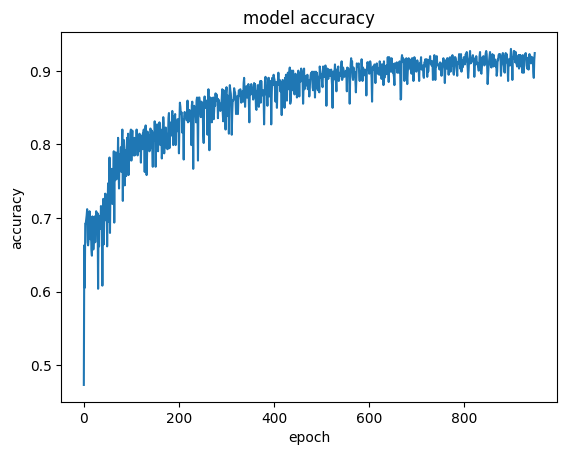

In [390]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

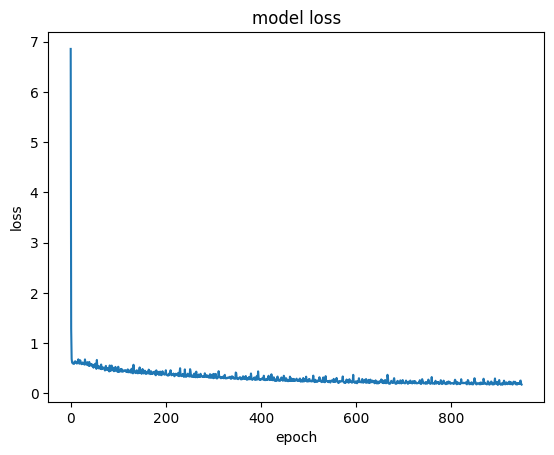

In [391]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Conclusão

Nesta resolução, provavelmente ocorreu o Overfitting, visto que a acurácia do treino ficou acima dos 90% e a do teste abaixo dos 80%. Acredito que isso ocorreu por conta do parâmetro "patience = 50" no Earling Stopping. Havia colocado um valor maior, por conta que valores baixos como "20" estavam parando o treinamento muito cedo, visto que havia muita variação e as vezes requeria mais iterações para a melhoria do modelo. Acredito que um valor ideal seria por volta de 30/40 para a melhor generalização do modelo.